In [1]:
from PIL import Image
import pandas as pd
import numpy as np
from sample_transforms import sample_RandomHorizontalFlip
from sample_transforms import sample_PilTiltRandomCrop
from sample_transforms import debug_show_image
from sample_transforms import sample_resize
from sample_transforms import sample_compose
def debug_load():
    Path = "./Example_Data/"
    df = pd.read_csv("./Example_Data/skeleton_positions_screen_f_0.csv")
    sample = {}
    sample["skeleton_position"] = df[["screen_pos_x","screen_pos_y"]].to_numpy()
    sample["image"] = (Image.open( Path + "default_f_0.png")).convert('RGB')
    return sample


In [18]:
sample = debug_load()
test = sample_compose([sample_PilTiltRandomCrop(122,scale=(0.8,1),magnitude=0.1),sample_RandomHorizontalFlip()])

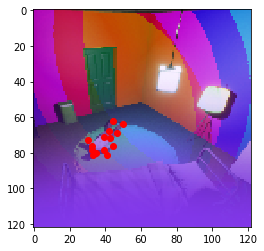

In [19]:
img, points = test([sample["image"]],[sample["skeleton_position"]],image_resamples=[Image.NEAREST])
sample["image"],sample["skeleton_position"] = img[0], points[0]
debug_show_image(sample["skeleton_position"],sample["image"])